# Parsing score with music21
* Goal: parse a score and put all notes involved into a python set

In [4]:
from music21 import *
import numpy as np
import math
import os
import time

In [5]:
score = converter.parse('bourree.xml')

In [6]:
score.analyze('key')

<music21.key.Key of G major>

## Finding number of Measures in score


In [7]:
print(score.parts)
print(len(score.parts))
print(f'there are {len(score.parts)} part(s) in score.parts')
for item in score.parts:
    print(item)
# for i in range(len(score.parts)):
#     print(score.parts[i]) 

<music21.stream.iterator.StreamIterator for Score:0x7fdb90959d10 @:0>
1
there are 1 part(s) in score.parts
<music21.stream.Part Part 1>


In [8]:
# isolate out the only part (聲部)
part = score.parts[0]
print(f'there are {len(part)} element(s) in part')
for i,item in enumerate(part, 1):
    print(f'item {i} : {item}') 

there are 24 element(s) in part
item 1 : P1: Part 1: 
item 2 : <music21.stream.Measure 1 offset=0.0>
item 3 : <music21.spanner.Slur <music21.note.Note D><music21.note.Note B>>
item 4 : <music21.spanner.Slur <music21.note.Note B><music21.note.Note B>>
item 5 : <music21.dynamics.Crescendo <music21.note.Note E><music21.note.Note G>>
item 6 : <music21.spanner.Slur <music21.note.Note E><music21.note.Note D>>
item 7 : <music21.spanner.Slur <music21.note.Note C><music21.note.Note B>>
item 8 : <music21.spanner.Slur <music21.note.Note B><music21.note.Note G>>
item 9 : <music21.dynamics.Crescendo <music21.note.Note B><music21.note.Note G>>
item 10 : <music21.spanner.Slur <music21.note.Note A><music21.note.Note C#>>
item 11 : <music21.spanner.Slur <music21.note.Note A><music21.note.Note C#>>
item 12 : <music21.dynamics.Diminuendo <music21.note.Note D><music21.note.Rest 16th>>
item 13 : <music21.spanner.Slur <music21.note.Note D><music21.note.Note B>>
item 14 : <music21.spanner.Slur <music21.note.

In [9]:
"""playing with Isaac's Code: verified is correct, but how does the math work?"""
# score: a stream object that can contain multiple streams
beats = score.getTimeSignatures(recurse=False)[0].denominator       #retrieve the time signature of object score and save only the denominator (duration of each beat)
num_measures = int(math.ceil(score.highestTime / beats))            #find the when the last note finishes playing in object stream, divide it by duration of each beat, and take the ceiling
print(f'there are {num_measures} measures in score')

there are 10 measures in score


## Collect all notes from all measures in a score

### printing all notes from all measures (attempt1)

In [10]:
# measures start with index 1 and can be accessed from score.measure(measure_num)

for i in range(1, num_measures+1, 1):
    measure_notes = part.measure(i).notes       #note in this example there is only one part, so this is working
    print(f'measure {i}:')
    for note in measure_notes:
        print(f'\t{note}')

measure 1:
	<music21.note.Note D>
measure 2:
	<music21.note.Note D>
	<music21.note.Note B>
	<music21.note.Note C>
	<music21.note.Note B>
	<music21.note.Note A>
	<music21.note.Note G>
measure 3:
	<music21.note.Note E>
	<music21.note.Note G>
	<music21.note.Note F#>
	<music21.note.Note E>
measure 4:
	<music21.note.Note D>
	<music21.note.Note C>
	<music21.note.Note B>
	<music21.note.Note A>
	<music21.note.Note B>
	<music21.note.Note C>
	<music21.note.Note A>
measure 5:
	<music21.note.Note B>
	<music21.note.Note G>
	<music21.note.Note A>
measure 6:
	<music21.note.Note B>
	<music21.note.Note C#>
	<music21.note.Note D>
	<music21.note.Note B>
	<music21.note.Note C#>
	<music21.note.Note D>
	<music21.note.Note E>
	<music21.note.Note C#>
measure 7:
	<music21.note.Note D>
	<music21.note.Note E>
	<music21.note.Note F#>
	<music21.note.Note D>
	<music21.note.Note E>
	<music21.note.Note F#>
	<music21.note.Note G>
	<music21.note.Note E>
measure 8:
	<music21.note.Note F#>
	<music21.note.Note G>
	<music2

## Collecting all notes from a measure and put them into a set

In [11]:
"""
    input:  measure (music21.stream.Measure)
    output: (set(music21.note.Note)): a set containing all notes present in the mxml file
"""
def collect_all_notes_from_measure(measure):
    return frozenset(note for note in measure.notes)

> compute the number of measures from a score

In [12]:
"""Isacc's code refactored into a function: but still do not know how does the math works"""
def find_num_measures_in_score(score):
    #might have to iterate through this part if there are multiple time signatures in a given score
    # beats = [timeSig.denominator for timeSig in score.getTimeSignatures(recurse=False)]   #the multiple time sig version
    beats = score.getTimeSignatures(recurse=False)[0].denominator       
    num_measures = int(math.ceil(score.highestTime / beats))
    return num_measures

> given score, get all notes from all parts which each contains different measures

In [13]:
"""
input: score (music21.stream.Score)
output: all_notes (set(music21.stream.Note))
"""
def collect_all_notes_from_score(score):
    all_notes = set()
    for part in score.parts:
        num_measures = find_num_measures_in_score(part)
        for i in range(1, num_measures+1, 1):
            all_notes.add(collect_all_notes_from_measure(part.measure(i)))
    return all_notes

> flattenning set

In [14]:
def flatten_frozenset_in_sets(input_set:set, final:set) -> set:
    for elem in input_set:
        if type(elem) == frozenset:
            flatten_frozenset_in_sets(set(elem), final)
        else:
            final.add(elem)

## Driver/test code for note collection from a given score

In [15]:
notes_set = collect_all_notes_from_score(score)
print(len(notes_set))
print(notes_set)
flattend_set = set()
flatten_frozenset_in_sets(notes_set, flattend_set)
print(flattend_set)         #"issue": why are there duplicate notes? are they different in pitch/dynamics/...etc.?
assert len(flattend_set) != len(notes_set), "flattend set should exclude repetitive notes in original set"

10
{frozenset({<music21.note.Note D>, <music21.note.Note D>}), frozenset({<music21.note.Note B>, <music21.note.Note D>, <music21.note.Note C>, <music21.note.Note B>, <music21.note.Note G>, <music21.note.Note A>}), frozenset({<music21.note.Note D>}), frozenset({<music21.note.Note F#>, <music21.note.Note D>, <music21.note.Note E>, <music21.note.Note G>, <music21.note.Note D>, <music21.note.Note E>, <music21.note.Note E>, <music21.note.Note F#>}), frozenset({<music21.note.Note B>, <music21.note.Note A>, <music21.note.Note G>}), frozenset({<music21.note.Note A>, <music21.note.Note A>, <music21.note.Note F#>, <music21.note.Note G>, <music21.note.Note C#>}), frozenset({<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note B>, <music21.note.Note B>, <music21.note.Note D>, <music21.note.Note A>, <music21.note.Note C>}), frozenset({<music21.note.Note E>, <music21.note.Note E>, <music21.note.Note G>, <music21.note.Note F#>}), frozenset({<music21.note.Note D>, <music21.note.Note C#>, <

# Notes:
* score: either .mxml or pdf(?)
* audio: assume a numpy array 

# Parsing Audio

## Q-transform

In [16]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Loading audio
audio, sr = librosa.load('Abide by Me.wav')
sr 

22050

In [18]:
n_samples = len(audio)
n_samples

811264

## Generate and plot a constant-Q power spectrum

In [19]:
y = audio.copy()
min_freq = 130.8        #by inspecting test_parse_score
n_bins = 12             #12-tones (C, C#, D, D#,...B) per octave

# Constant Q transform from librosa library
C = np.abs(librosa.cqt(y, sr=sr, n_bins=n_bins, fmin=min_freq))

In [36]:
print(type(C))
print(C.shape)
print(len(C))
C[:3,:3]

<class 'numpy.ndarray'>
(12, 1585)
12


array([[1.2861622e-03, 1.0893173e-03, 4.5142278e-05],
       [1.0931247e-03, 1.2998125e-03, 1.0456471e-03],
       [7.6908793e-04, 1.0942091e-03, 7.7534362e-04]], dtype=float32)

SoftMax each row for C

In [33]:
from scipy.special import softmax
softC = softmax(C, axis=1)

In [34]:
print(softC.shape)
softC

(12, 1585)


array([[0.00061874, 0.00061862, 0.00061797, ..., 0.0006182 , 0.00061902,
        0.00061966],
       [0.00062325, 0.00062338, 0.00062322, ..., 0.00062305, 0.00062316,
        0.00062425],
       [0.00062538, 0.00062558, 0.00062539, ..., 0.00062536, 0.0006261 ,
        0.00062699],
       ...,
       [0.00062246, 0.00062416, 0.00062606, ..., 0.00062286, 0.00062193,
        0.00062436],
       [0.00062093, 0.00062081, 0.00062239, ..., 0.00062236, 0.00062193,
        0.00062366],
       [0.00061871, 0.00061937, 0.00061847, ..., 0.00061984, 0.0006192 ,
        0.0006232 ]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


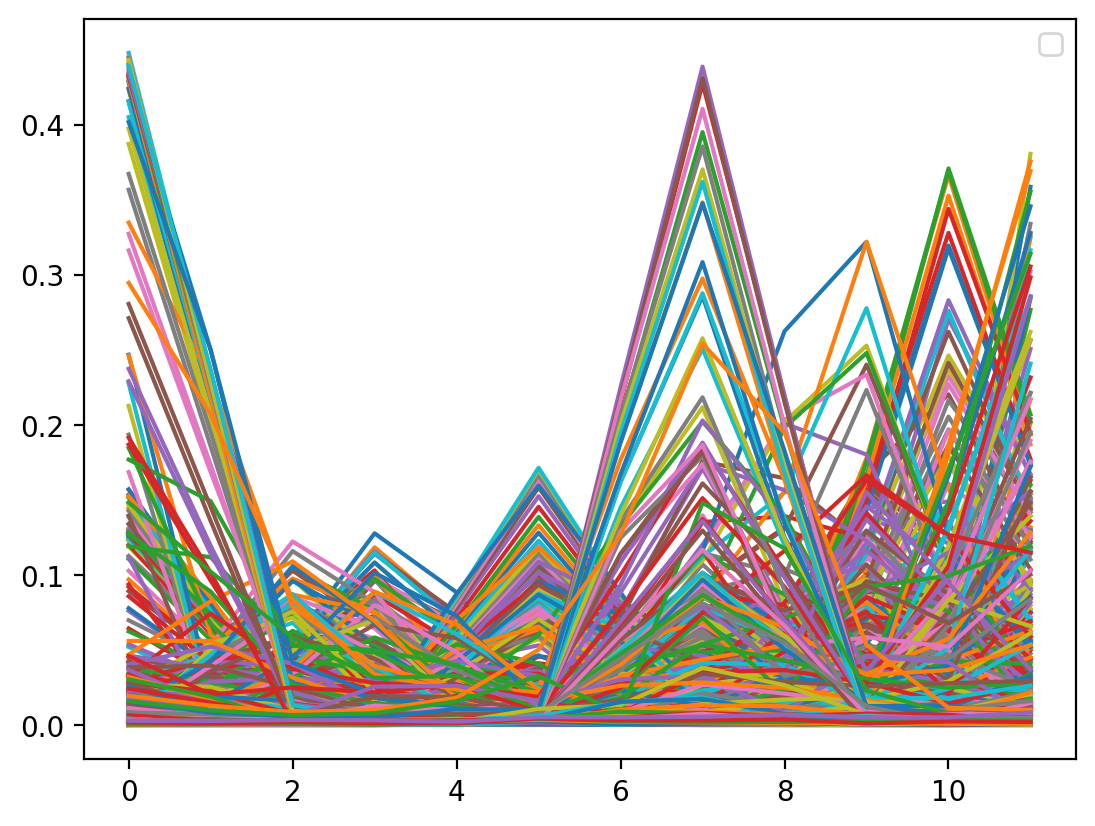

In [27]:
import matplotlib.pyplot as plt
plt.plot(C)
labels = ['0'+i for i in range(12)]

plt.show()

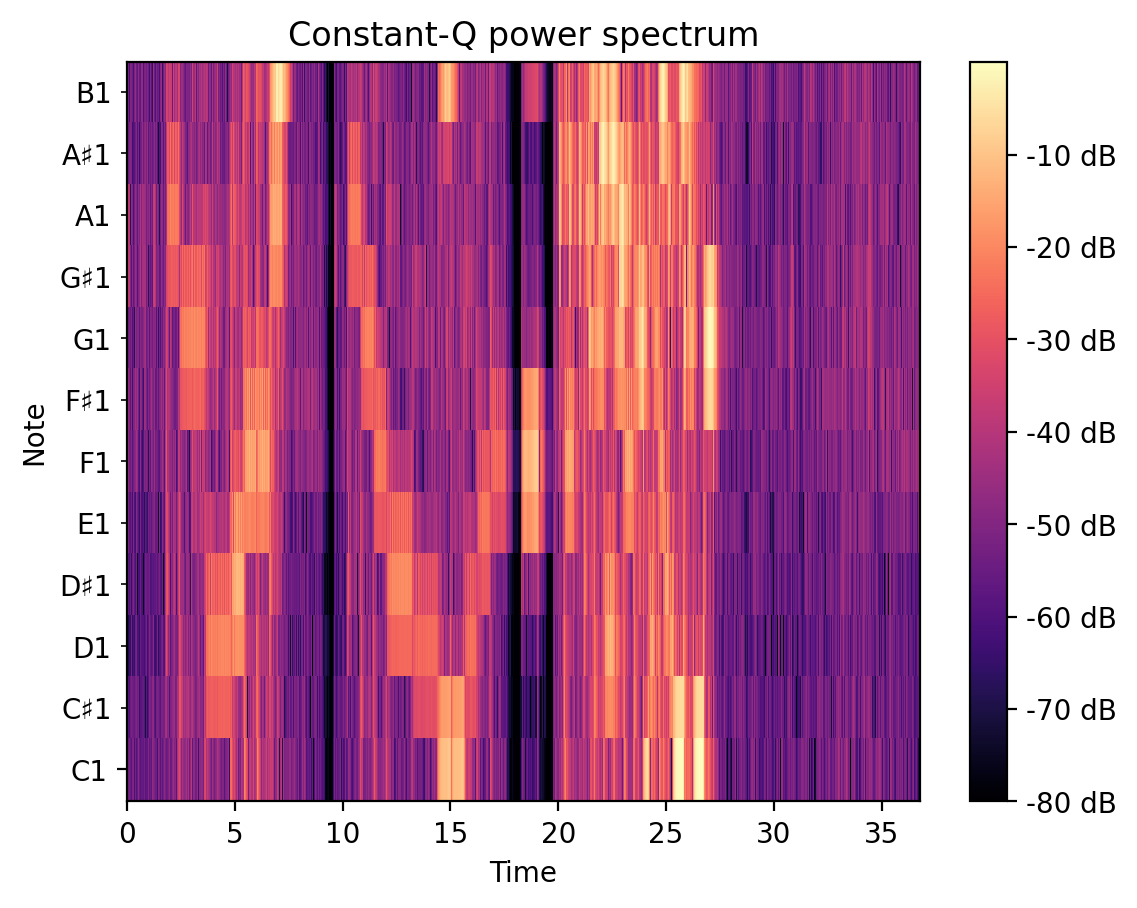

In [22]:
# plotting chromagram
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")                           

In [23]:
print(img)

## Chroma CQT

In [24]:
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

In [25]:
print(type(chroma_cq))
print(chroma_cq.shape)
chroma_cq[:3, :3]

<class 'numpy.ndarray'>
(12, 1585)


array([[0.47132063, 0.23858775, 0.16272403],
       [0.7094639 , 0.33236855, 0.16550869],
       [1.        , 1.        , 0.8611724 ]], dtype=float32)

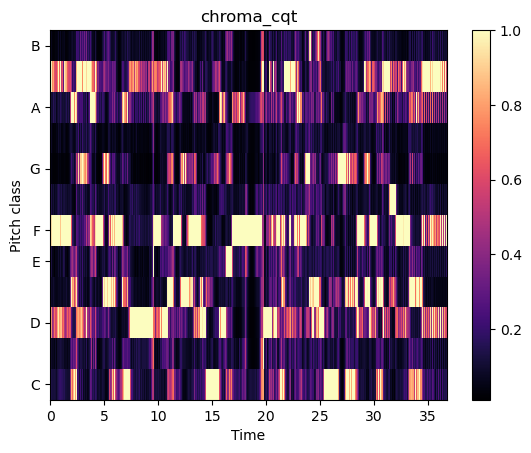

In [26]:
# plotting
fig1, ax1 = plt.subplots()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax1)
ax1.set(title='chroma_cqt')
fig1.colorbar(img, ax=ax1)
